In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os

In [2]:
from notify_run import Notify

In [3]:
notify = Notify()

In [4]:
notify.register()

Endpoint: https://notify.run/pkWHPlkKR3c5XuSP
To subscribe, open: https://notify.run/c/pkWHPlkKR3c5XuSP
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [5]:
os.chdir('../data/interim')

In [6]:
os.listdir()

['.gitkeep',
 'data post-eda.csv',
 'joined data full.csv',
 'joined data post-markdowns.csv',
 'joined data pre-markdowns.csv']

### Generate Dummy Features

My approach is going to be dropping the markdown columns in order to have access to the entire data set for training.

In [7]:
# Loading full joined data as df
df = pd.read_csv('data post-eda.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1


In [8]:
# Dropping markdown columns
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [9]:
# Show info of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  int64  
 10  Size          421570 non-null  int64  
 11  Month         421570 non-null  int64  
 12  Week          421570 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 41.8+ MB


Columns that should have dummy features encoded:
- Store
- Dept
- Type
- Month
- Week

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,211.671989,7.838,2,151315,1,1


I plan to create 3 separate models. One for each of the different store types.

In [11]:
# Create dummy features
deptDummies = pd.get_dummies(df['Dept'], prefix='Dept', drop_first=True)
monthDummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
weekDummies = pd.get_dummies(df['Week'], prefix='Week', drop_first=True)

In [12]:
# Join dummy features onto dataframe
df = df.join([deptDummies, monthDummies, weekDummies])

In [13]:
# Drop original features
df.drop(columns=['Dept', 'Month', 'Week'], inplace=True)

In [14]:
# Split the data by 3 store types
df0 = df.loc[df.Type == 0]
df1 = df.loc[df.Type == 1]
df2 = df.loc[df.Type == 2]

In [15]:
# Drop Type and Date features
df0 = df0.drop(columns=['Type'])
df1 = df1.drop(columns=['Type'])
df2 = df2.drop(columns=['Type'])

In [16]:
# Create Store Dummy Features
storeDummies0 = pd.get_dummies(df0['Store'], prefix='Store', drop_first=True)
storeDummies1 = pd.get_dummies(df1['Store'], prefix='Store', drop_first=True)
storeDummies2 = pd.get_dummies(df2['Store'], prefix='Store', drop_first=True)

In [17]:
# Join Store dummes to dataframes
df0 = df0.join(storeDummies0)
df1 = df1.join(storeDummies1)
df2 = df2.join(storeDummies2)

In [18]:
# Drop Store columns from dataframes
df0 = df0.drop(columns=['Store'])
df1 = df1.drop(columns=['Store'])
df2 = df2.drop(columns=['Store'])

In [19]:
# Print dataframe shapes
print(df0.shape)
print(df1.shape)
print(df2.shape)

(42597, 155)
(163495, 166)
(215478, 171)


### Train Test Split

We want to perform a train test split prior to scaling the data to prevent data leakage

In [20]:
trainmask0 = df0.Date < '2012-01-01'
testmask0 = df0.Date >= '2012-01-01'
trainmask1 = df1.Date < '2012-01-01'
testmask1 = df1.Date >= '2012-01-01'
trainmask2 = df2.Date < '2012-01-01'
testmask2 = df2.Date >= '2012-01-01'

In [21]:
dftrain0 = df0.loc[trainmask0]
dftest0 = df0.loc[testmask0]
dftrain1 = df1.loc[trainmask1]
dftest1 = df1.loc[testmask1]
dftrain2 = df2.loc[trainmask2]
dftest2 = df2.loc[testmask2]

In [22]:
X_train0 = dftrain0.drop(columns=['Date', 'Weekly_Sales'])
y_train0 = dftrain0[['Weekly_Sales']]
X_test0 = dftest0.drop(columns=['Date', 'Weekly_Sales'])
y_test0 = dftest0[['Weekly_Sales']]
X_train1 = dftrain1.drop(columns=['Date', 'Weekly_Sales'])
y_train1 = dftrain1[['Weekly_Sales']]
X_test1 = dftest1.drop(columns=['Date', 'Weekly_Sales'])
y_test1 = dftest1[['Weekly_Sales']]
X_train2 = dftrain2.drop(columns=['Date', 'Weekly_Sales'])
y_train2 = dftrain2[['Weekly_Sales']]
X_test2 = dftest2.drop(columns=['Date', 'Weekly_Sales'])
y_test2 = dftest2[['Weekly_Sales']]

### Apply Scaler Transformation to X_train

In [23]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [24]:
# Initialize scaler and fit_transform X_train
scaler0 = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.fit_transform(X_train0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
X_train1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.fit_transform(X_train1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
X_train2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.fit_transform(X_train2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

In [25]:
# Verify that tranformation was successful
X_train0.head()

,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept_2,Dept_3,Dept_4,Dept_5,...,Week_48,Week_49,Week_50,Week_51,Week_52,Store_37,Store_38,Store_42,Store_43,Store_44
1993,0,0.232973,-1.410129,1.021646,-0.546596,2.039619,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,0,0.232973,-1.410129,1.021646,-0.546596,2.039619,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0.232973,-1.410129,1.021646,-0.546596,2.039619,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0.232973,-1.410129,1.021646,-0.546596,2.039619,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0.232973,-1.410129,1.021646,-0.546596,2.039619,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Apply scaler transformation to test data
X_test0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.transform(X_test0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
X_test1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.transform(X_test1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
X_test2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.transform(X_test2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

### Modeling
#### I will initially focus on store Type 0 and then apply successful modeling strategy to Type 1 and Type 2 once established

In [27]:
# Import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
# Build function for fitting model, and running metrics
def modeling(reg, X_train, y_train, X_test, y_test, plot=True):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    try:
        print('Best parameters: ' + str(reg.best_params_))
    except:
        pass
    print('R2 training score = ' + str(round(reg.score(X_train, y_train), 4)))
    print('R2 testing score = ' + str(round(r2_score(y_test, y_pred), 4)))
    print('Root-mean-squared test score ' + str(round(mean_squared_error(y_test, y_pred, squared=False))))
    if plot == True:
        _ = plt.figure(figsize=(10, 7))
        _ = plt.scatter(np.ravel(y_test), y_pred)
        _ = plt.plot([1, y_test.max()], [1, y_test.max()], c='black')
        plt.xlabel('y Test')
        plt.ylabel('y Prediction')
        plt.title('y Test vs y Prediction')
        _ = plt.show()

Let's try a standard linear regression to start

In [29]:
# Import module
from sklearn.linear_model import LinearRegression

# Intantiate model
linreg = LinearRegression()

In [30]:
%%time
print('Linear Regression - Store Type 0')
modeling(linreg, X_train0, y_train0, X_test0, y_test0, plot=False)

Linear Regression - Store Type 0
R2 training score = 0.9016
R2 testing score = -2.045229849306764e+21
Root-mean-squared test score 741271290723243.0
Wall time: 268 ms


In [31]:
%%time
print('Linear Regression - Store Type 1')
modeling(linreg, X_train1, y_train1, X_test1, y_test1, plot=False)

Linear Regression - Store Type 1
R2 training score = 0.6449
R2 testing score = -6.633066085404768e+21
Root-mean-squared test score 1289683520810068.0
Wall time: 1.29 s


In [32]:
%%time
print('Linear Regression - Store Type 2')
modeling(linreg, X_train2, y_train2, X_test2, y_test2, plot=False)

Linear Regression - Store Type 2
R2 training score = 0.7974
R2 testing score = -2.0908553268226996e+21
Root-mean-squared test score 1192169584128924.0
Wall time: 1.81 s


Standard linear regression performed very poorly. Let's try ridge regression just to see.

In [33]:
# Import module
from sklearn.linear_model import Ridge
ridgereg = Ridge(random_state=42)

Ridge Regression - alpha=1 - Store Type 0
R2 training score = 0.9016
R2 testing score = 0.9215
Root-mean-squared test score 4594.0


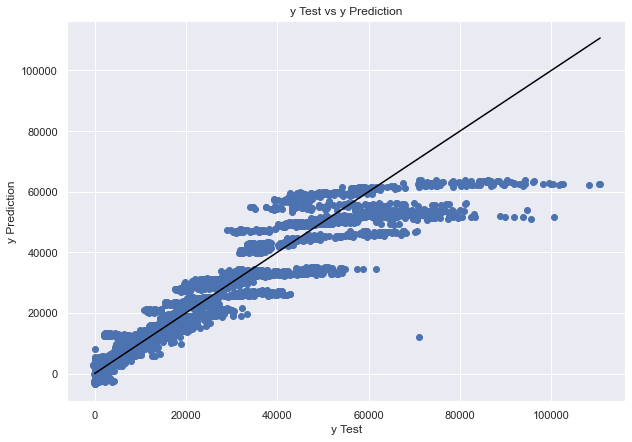

Wall time: 462 ms


In [34]:
%%time
print('Ridge Regression - alpha=1 - Store Type 0')
modeling(ridgereg, X_train0, y_train0, X_test0, y_test0)

This performed significantly better. Let's do GridSearchCV to tune alpha.

In [35]:
# Import module
from sklearn.model_selection import GridSearchCV

Ridge Regression - GridSearchCV alpha - Store Type 0
Best parameters: {'alpha': 0.1}
R2 training score = 0.9016
R2 testing score = 0.9218
Root-mean-squared test score 4584.0


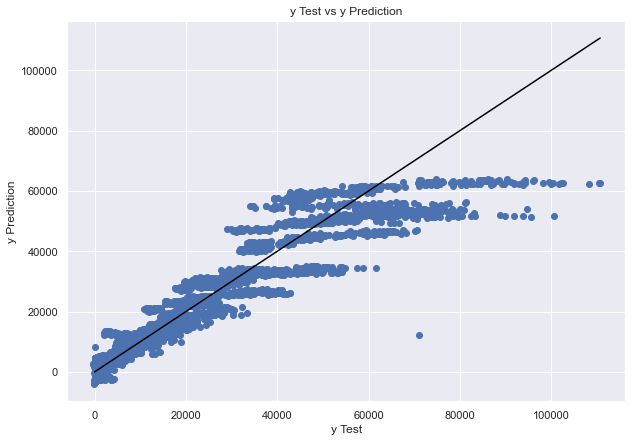

Wall time: 4.8 s


In [36]:
%%time
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridgeGS = GridSearchCV(ridgereg, param_grid)
print('Ridge Regression - GridSearchCV alpha - Store Type 0')
modeling(ridgeGS, X_train0, y_train0, X_test0, y_test0)

Let's see how it does on Type 1 and Type 2 stores

Ridge Regression - GridSearchCV alpha - Store Type 1
Best parameters: {'alpha': 1}
R2 training score = 0.6449
R2 testing score = 0.7262
Root-mean-squared test score 8285.0


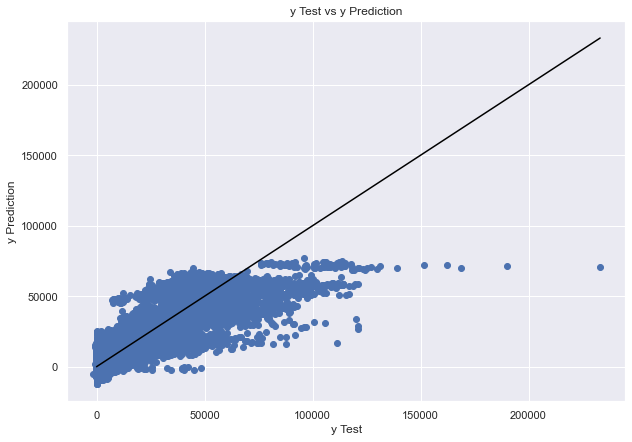

Wall time: 17 s


In [37]:
%%time
print('Ridge Regression - GridSearchCV alpha - Store Type 1')
modeling(ridgeGS, X_train1, y_train1, X_test1, y_test1)

Ridge Regression - GridSearchCV alpha - Store Type 2
Best parameters: {'alpha': 1}
R2 training score = 0.7974
R2 testing score = 0.8354
Root-mean-squared test score 10577.0


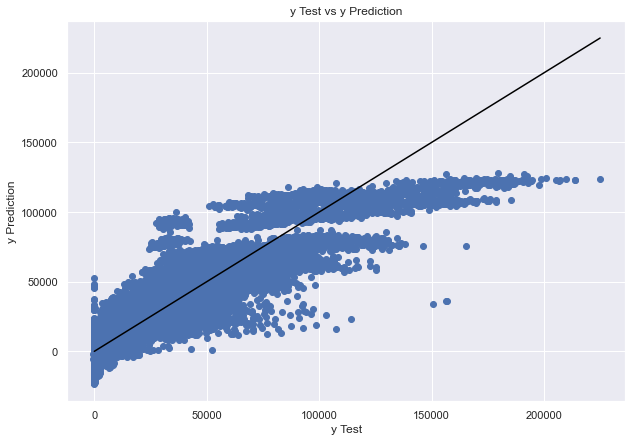

Wall time: 23.1 s


In [38]:
%%time
print('Ridge Regression - GridSearchCV alpha - Store Type 2')
modeling(ridgeGS, X_train2, y_train2, X_test2, y_test2)

###### Let's try a Random Forest Regression to see if it does any better

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Define elbow plot function to determine appropriate parameters to use

def rfdepthelbow(valmax, X_train, y_train, X_test, y_test):

    ndepth = []
    nrmse = []

    for i in range(2, valmax+1):
        reg = RandomForestRegressor(max_depth=i, random_state=42, n_jobs=-1)
        reg.fit(X_train, np.ravel(y_train))
        y_pred = reg.predict(X_test)
        nrmse.append(mean_squared_error(y_test, y_pred, squared=False))
        ndepth.append(i)
        
    RFElbow = pd.DataFrame({'Max Depth':ndepth, 'Root-Mean-Squared Error':nrmse})
    fig = plt.figure(figsize=(15,7))
    _ = sns.lineplot(x='Max Depth', y='Root-Mean-Squared Error', data=RFElbow)
    _ = plt.title('Max Depth Elbow Plot')

Wall time: 3min 56s


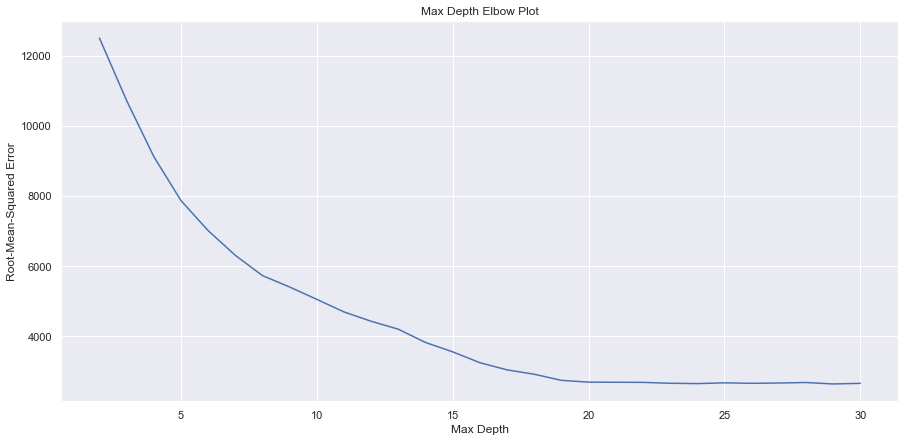

In [51]:
%%time
rfdepthelbow(30, X_train0, y_train0, X_test0, y_test0)

It looks like 19 is a good max depth for Random Forest Regression

Random Forest - max_depth=19 - Store Type 0
R2 training score = 0.9868
R2 testing score = 0.9719
Root-mean-squared test score 2747.0


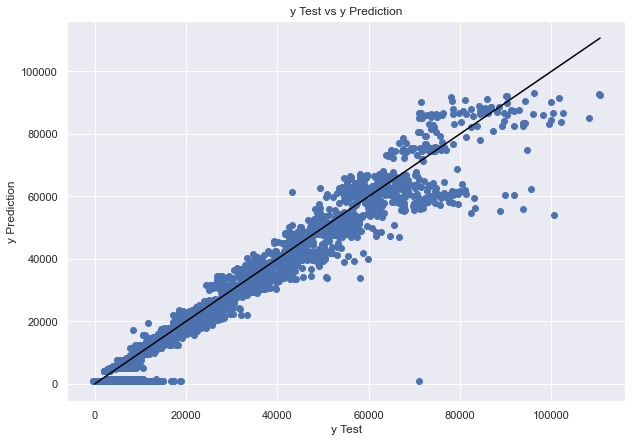

Wall time: 10 s


In [41]:
%%time
RFreg = RandomForestRegressor(max_depth=19, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=19 - Store Type 0')
modeling(RFreg, X_train0, np.ravel(y_train0), X_test0, np.ravel(y_test0))

Let's do the same operations for for df1

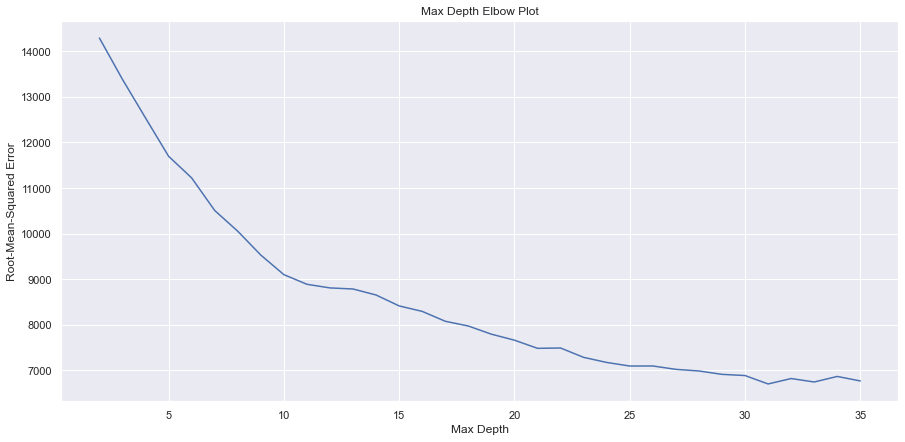

In [143]:
rfdepthelbow(35, X_train1, y_train1, X_test1, y_test1)

There's a bit of an elbow at 10, but bringing down to 30 levels it off at ~$2,000 less RMSE. Seemed to level off around 30. Let's try max_depth=10 and max_depth=30 and compare

Random Forest - max_depth=10 - Store Type 1
R2 training score = 0.7001
R2 testing score = 0.6697
Root-mean-squared test score 9100.0


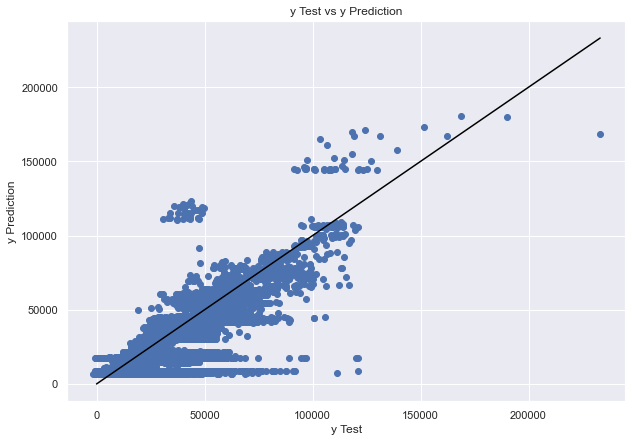

Wall time: 28.1 s


In [42]:
%%time
RFreg = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=10 - Store Type 1')
modeling(RFreg, X_train1, np.ravel(y_train1), X_test1, np.ravel(y_test1))

Random Forest - max_depth=30 - Store Type 1
R2 training score = 0.9302
R2 testing score = 0.8108
Root-mean-squared test score 6887.0


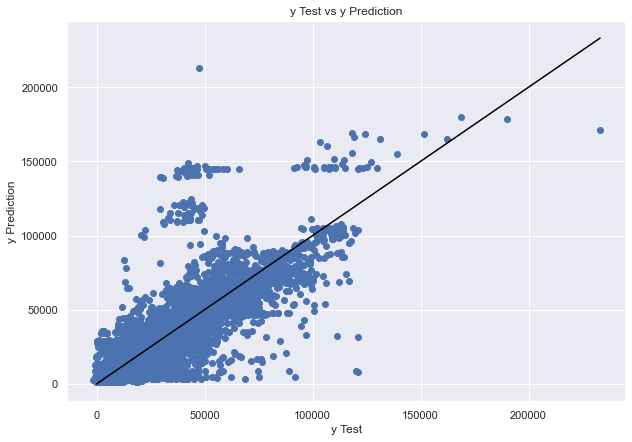

Wall time: 1min 9s


In [43]:
%%time
RFreg = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=30 - Store Type 1')
modeling(RFreg, X_train1, np.ravel(y_train1), X_test1, np.ravel(y_test1))

Decent improvement from 10 to 30 for Store 1

Try it out on Store 2

Random Forest - max_depth=10 - Store Type 2
R2 training score = 0.7294
R2 testing score = 0.7535
Root-mean-squared test score 12944.0


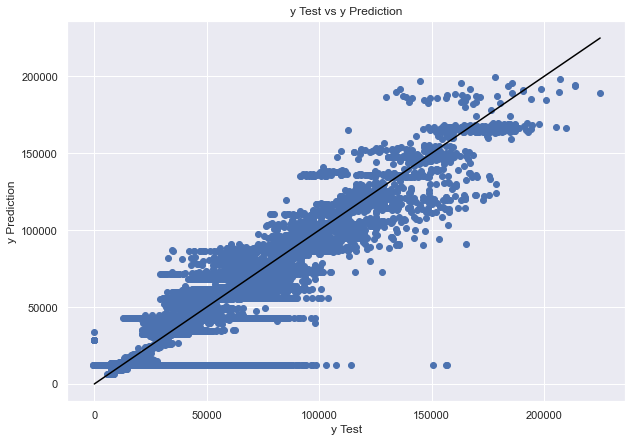

Wall time: 39.4 s


In [44]:
%%time
RFreg = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=10 - Store Type 2')
modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

Random Forest - max_depth=20 - Store Type 2
R2 training score = 0.8855
R2 testing score = 0.8663
Root-mean-squared test score 9534.0


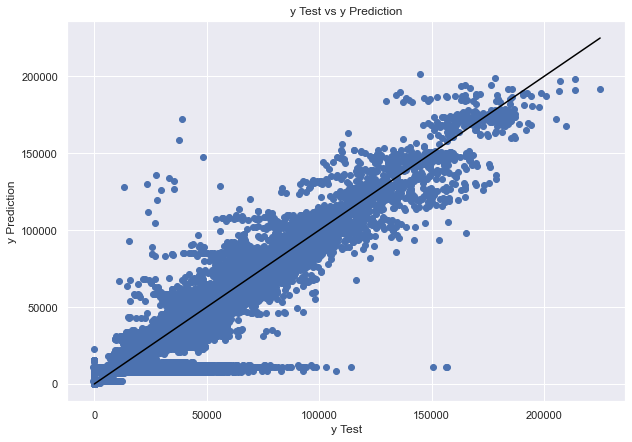

Wall time: 1min 14s


In [45]:
%%time
RFreg = RandomForestRegressor(max_depth=20, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=20 - Store Type 2')
modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

Random Forest - max_depth=30 - Store Type 2
R2 training score = 0.9416
R2 testing score = 0.9089
Root-mean-squared test score 7870.0


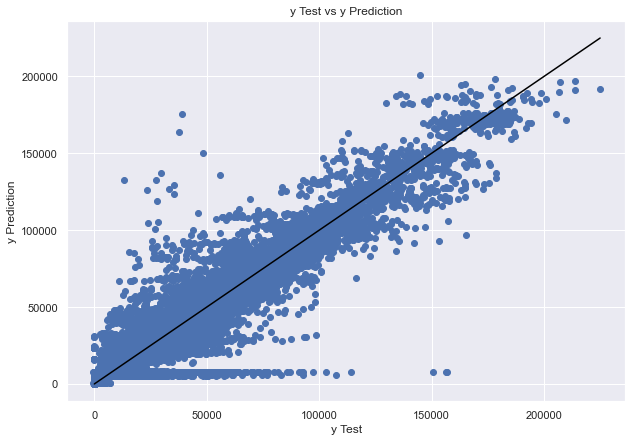

Wall time: 1min 42s


In [46]:
%%time
RFreg = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=30 - Store Type 2')
modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

##### Let's try applying cluster features to the data and see if that helps segment it a bit more

In [47]:
from sklearn.cluster import KMeans

In [48]:
def knnelbow(valmax, X_train):

    nclusters = []
    kinertia = []

    for i in range(2, valmax+1):
        kmean = KMeans(n_clusters=i, random_state=42)
        kmean.fit(X_train)
        inertia = kmean.inertia_
        kinertia.append(inertia)
        nclusters.append(i)
        
    KMelbow = pd.DataFrame({'N Clusters':nclusters, 'Inertia':kinertia})
    fig = plt.figure(figsize=(15,7))
    _ = sns.lineplot(x='N Clusters', y='Inertia', data=KMelbow)
    _ = plt.title('N Clusters K Means Elbow Plot')

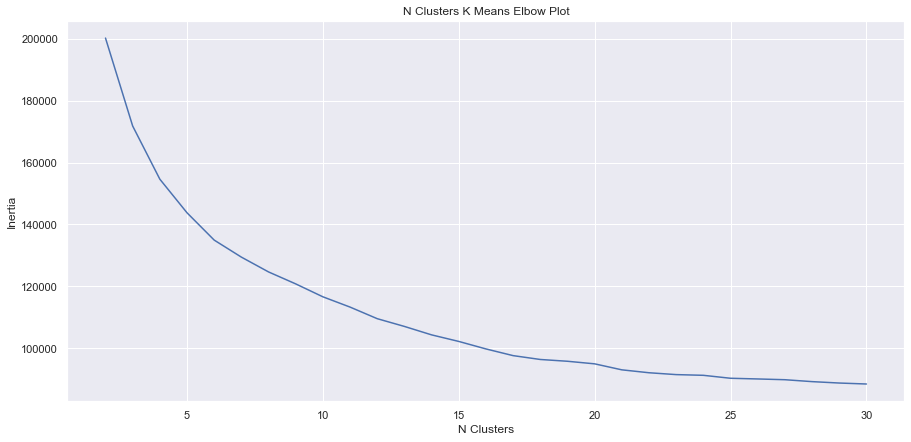

In [55]:
knnelbow(30, X_train0)

It looks like n=5 and 20 are worth trying

In [60]:
def clustermodeling(clusters, depth, X_train, y_train, X_test, y_test):
    kmn = KMeans(n_clusters=clusters, random_state=42)
    kmn.fit(X_train)
    kmntrain = kmn.labels_
    kmntest = kmn.predict(X_test)
    X_train['cluster'] = kmntrain
    clusterDumTrain = pd.get_dummies(X_train['cluster'], prefix='Cluster', drop_first=True)
    X_train = X_train.join(clusterDumTrain)
    X_test['cluster'] = kmntest
    clusterDumTest = pd.get_dummies(X_test['cluster'], prefix='Cluster', drop_first=True)
    X_test = X_test.join(clusterDumTest)
    setdif = np.setdiff1d(X_train.cluster.unique(), X_test.cluster.unique())
    for i in setdif:
        X_test['cluster_' + str(i)] = np.zeros(shape=(X_test.shape[0], 1))    
    X_train = X_train.drop(columns='cluster')
    X_test = X_test.drop(columns='cluster')
    RFreg = RandomForestRegressor(max_depth=depth, random_state=42, n_jobs=-1)
    modeling(RFreg, X_train, np.ravel(y_train), X_test, np.ravel(y_test))

R2 training score = 0.9869
R2 testing score = 0.9714
Root-mean-squared test score 2773.0


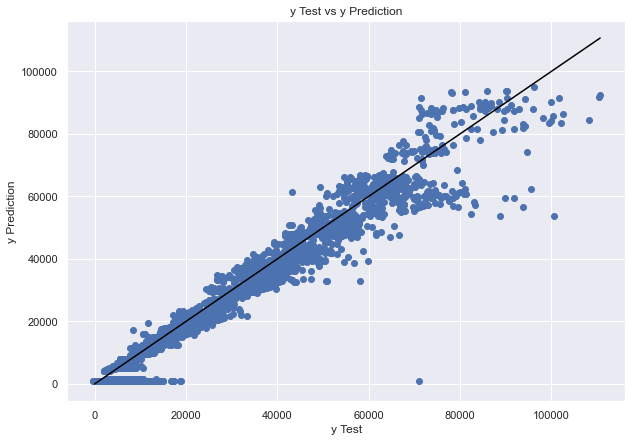

Wall time: 12.7 s


In [72]:
%%time
clustermodeling(5, 19, X_train0, y_train0, X_test0, y_test0)

R2 training score = 0.9868
R2 testing score = 0.9715
Root-mean-squared test score 2769.0


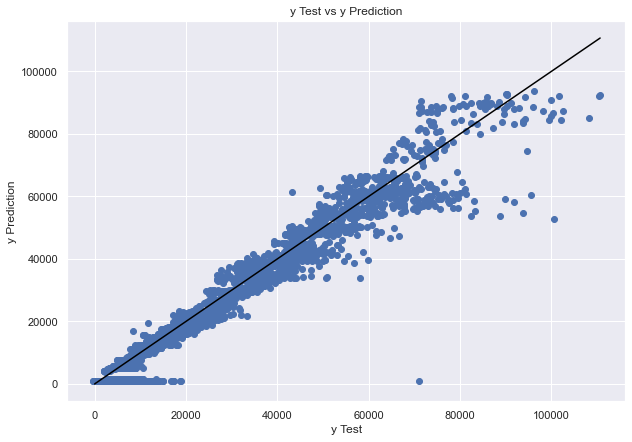

Wall time: 14.5 s


In [62]:
%%time
clustermodeling(20, 19, X_train0, y_train0, X_test0, y_test0)

R2 training score = 0.9303
R2 testing score = 0.817
Root-mean-squared test score 6773.0


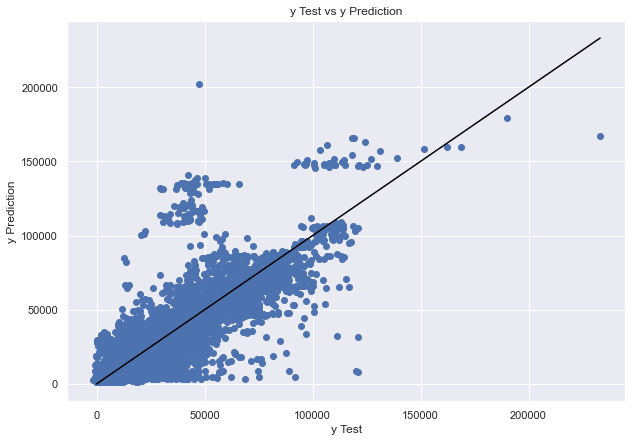

Wall time: 1min 18s


In [70]:
%%time
clustermodeling(5, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9303
R2 testing score = 0.8145
Root-mean-squared test score 6821.0


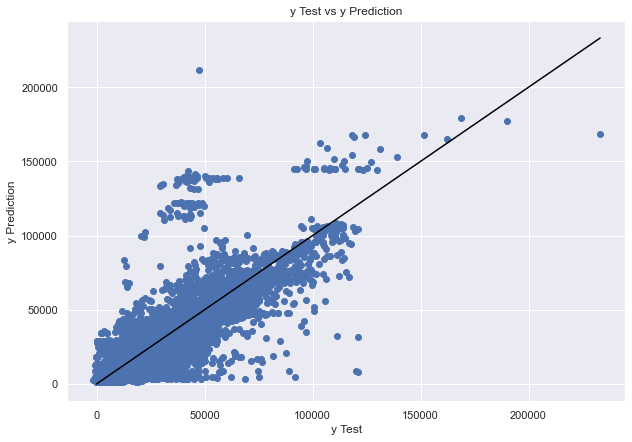

Wall time: 1min 54s


In [73]:
%%time
clustermodeling(20, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9416
R2 testing score = 0.9084
Root-mean-squared test score 7892.0


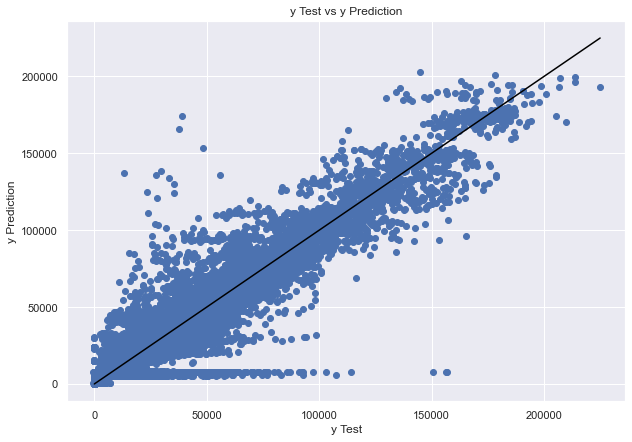

Wall time: 1min 59s


In [71]:
%%time
clustermodeling(5, 30, X_train2, y_train2, X_test2, y_test2)

R2 training score = 0.9416
R2 testing score = 0.9087
Root-mean-squared test score 7877.0


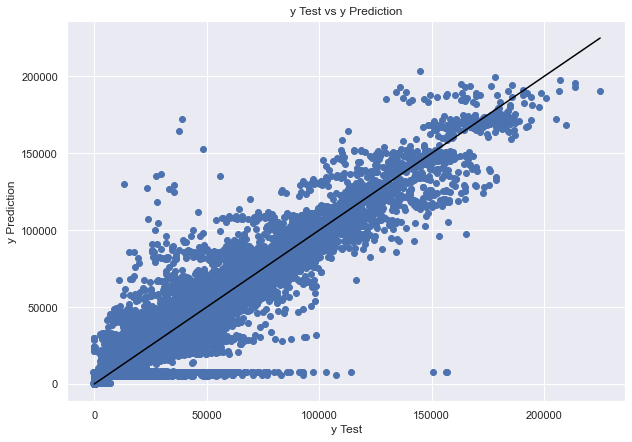

Wall time: 2min 29s


In [74]:
%%time
clustermodeling(20, 30, X_train2, y_train2, X_test2, y_test2)

#### Let's build a function to log metrics for evaluation of each department at each store

In [75]:
type0Stores = [col for col in X_test0.columns if 'Store' in col]
type0Depts = [col for col in X_test0.columns if 'Dept' in col]
type1Stores = [col for col in X_test1.columns if 'Store' in col]
type1Depts = [col for col in X_test1.columns if 'Dept' in col]
type2Stores = [col for col in X_test2.columns if 'Store' in col]
type2Depts = [col for col in X_test2.columns if 'Dept' in col]

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
def storedepttest(store, dept, reg, X_test, y_test):
    smask = X_test[store] == 1
    dmask = X_test[dept] == 1

    SDX_test = X_test.loc[smask].loc[dmask]
    SDX_testIDX = SDX_test.index

    SDy_test = y_test.loc[SDX_testIDX]

    SDy_pred = reg.predict(SDX_test)
    
    MAPE = np.mean(np.abs((SDy_test - SDy_pred) / SDy_test))
    
    return [mean_absolute_error(SDy_test, SDy_pred), MAPE, mean_squared_error(SDy_test, SDy_pred, squared=False)]

In [111]:
def storedepttestagg(typestores, typedepts, reg, X_train, y_train, X_test, y_test):
    
    stores = []
    depts = []
    MAEs = []
    MAPEs =[]
    RMSEs = []
    
    reg = reg.fit(X_train, y_train)
    
    for i in typestores:
            for k in typedepts:
                try:
                    l, m, o = storedepttest(i, k, reg, X_test, y_test)
                    MAEs.append(l)
                    RMSEs.append(o)
                    stores.append(i)
                    depts.append(k)
                    MAPEs.append(m)
                except:
                    pass
    results = [stores, depts, MAEs, MAPEs, RMSEs]
    results = pd.DataFrame(results, index=['Store', 'Dept', 'MAE', 'MAPEs', 'RMSE']).transpose().astype({'MAE': 'float64', 'MAPEs':'float64', 'RMSE': 'float64'})
    return results

In [112]:
%%time
RFreg0 = RandomForestRegressor(max_depth=19, random_state=42, n_jobs=-1)
Type0Results = storedepttestagg(type0Stores, type0Depts, RFreg0, X_train0, y_train0, X_test0, y_test0)

Wall time: 42.7 s


In [113]:
Type0Results.describe()

,MAE,MAPEs,RMSE
count,6.000000,6.000000,6.000000
mean,965.976552,168.279950,965.976552
std,11.541682,141.119387,11.541682
min,948.434886,37.937395,948.434886
25%,960.684886,78.188155,960.684886
50%,967.309886,108.159432,967.309886
75%,970.747386,251.178678,970.747386
max,982.434886,388.373954,982.434886


*I'm not happy with how this performs on specific stores and departments. I should create different models fit by store Type.*

#### Let's try reducing the dimensionality of these with PCA and then fitting

In [27]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA()
pca.fit(X_train1)

PCA()

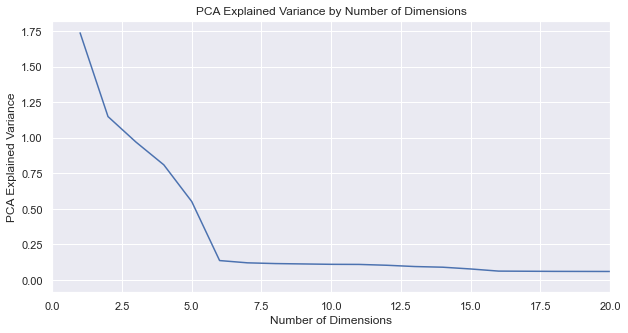

In [118]:
sns.set()
_ = plt.figure(figsize=(10,5))
_ = plt.plot(np.arange(pca.explained_variance_.shape[0])+1, pca.explained_variance_)
_ = plt.title('PCA Explained Variance by Number of Dimensions')
_ = plt.xlabel('Number of Dimensions')
_ = plt.ylabel('PCA Explained Variance')
_ = plt.xlim(0, 20)
_ = plt.show()
_ = plt.close()

It looks like we could set n_components=6

In [28]:
pca = PCA(n_components=6)
pcaX_train1 = pca.fit_transform(X_train1)
pcaX_test1 = pca.transform(X_test1)

In [31]:
from sklearn.svm import LinearSVR

In [32]:
# Let's try SVR
pcaSVR1 = LinearSVR()
pcaSVR1.fit(pcaX_train1, np.ravel(y_train1))
y_pred1 = pcaSVR1.predict(pcaX_test1)
print('SVR - Store Type 1')
print('R2 training score = ' + str(round(pcaSVR1.score(pcaX_train1, y_train1), 4)))
print('R2 testing score = ' + str(round(r2_score(y_test1, y_pred1), 4)))
print('Root-mean-squared test score ' + str(round(mean_squared_error(y_test1, y_pred1, squared=False))))

SVR - Store Type 1
R2 training score = -0.0858
R2 testing score = -0.0905
Root-mean-squared test score 16536.0


In [33]:
pca = PCA(n_components=6)
pcaX_train0 = pca.fit_transform(X_train0)
pcaX_test0 = pca.transform(X_test0)

In [34]:
# Let's try SVR
pcaSVR0 = LinearSVR()
pcaSVR0.fit(pcaX_train0, np.ravel(y_train0))
y_pred0 = pcaSVR0.predict(pcaX_test0)
print('SVR - Store Type 0')
print('R2 training score = ' + str(round(pcaSVR0.score(pcaX_train0, y_train0), 4)))
print('R2 testing score = ' + str(round(r2_score(y_test0, y_pred0), 4)))
print('Root-mean-squared test score ' + str(round(mean_squared_error(y_test0, y_pred0, squared=False))))

SVR - Store Type 0
R2 training score = -0.2781
R2 testing score = -0.2705
Root-mean-squared test score 18475.0
